In [1]:
import healpy as hp
from pixell import enmap, utils, powspec, enplot, reproject #, pointsrcs
#import rotfuncs
from astropy.io import fits   # for saving/reeading maps
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np

# Read public ACT footprint

In [2]:
# Read ACT mask
path = './input/act_dr5/public_act_dr5_mask_full_foot_gal60_ps.fits'
actMask = enmap.read_map(path)
if len(actMask.shape)>2:
         actMask = actMask[0]

In [3]:
lMax = 1000
nSide = 2048
actMask = reproject.healpix_from_enmap(actMask, lMax, nSide)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [4]:
# Mask the mask for plotting ;)
actMaskPlot = hp.ma(actMask)
actMaskPlot.mask = actMask<0.5#np.logical_not(actMask)

# Read DESI 14k footprint, and 10k footprint from Eddie (May 10 2021)

In [5]:
# Read DESI footprint
path = './input/desi_10k/footprint_desi_10k_schlafly_20210510.ecsv'
table = Table.read(path, format='ascii.ecsv')
# Keep the tiles as Eddie Schalfly does:
#The 10k footprint has IN_DESI = True and PRIORITY_BOOSTFAC = 1.  The remaining 4k deg^2 has PRIORITY_BOOSTFAC < 1.
I = table['IN_DESI'] * (table['PRIORITY_BOOSTFAC']==1)
table10k = table[I]
J = table['IN_DESI'] * (table['PRIORITY_BOOSTFAC']<=1)
table14k = table[J]


# Read HSC footprint

In [8]:
hscS20A = hp.read_map('./input/hsc_s20a/s20a_fdfc_hp_contarea_izy-gt-5.fits')

NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


In [9]:
# Mask the mask for plotting ;)
hscS20APlot = hp.ma(hscS20A)
hscS20APlot.mask = hscS20A<0.5#np.logical_not(actMask)

# Read KiDS1000 footprint

In [10]:
kids1000 = hp.read_map('./input/kids_1000/KiDS_K1000_healpix.fits')

NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [11]:
# Mask the mask for plotting ;)
kids1000Plot = hp.ma(kids1000)
kids1000Plot.mask = kids1000<0.5#np.logical_not(actMask)

# Read DES Y3 footprint?

In [12]:
# desY3 = hp.read_map('./input/des_y3/y3a2_footprint_griz_1exp_v1.0.fits.gz')

In [13]:
# # Mask the mask for plotting ;)
# desY3Plot = hp.ma(desY3)
# desY3Plot.mask = desY3<0.5#np.logical_not(actMask)

# Overlap ACT (green), DESI 10k (red), DESI 14k (magenta)

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


<Figure size 432x288 with 0 Axes>

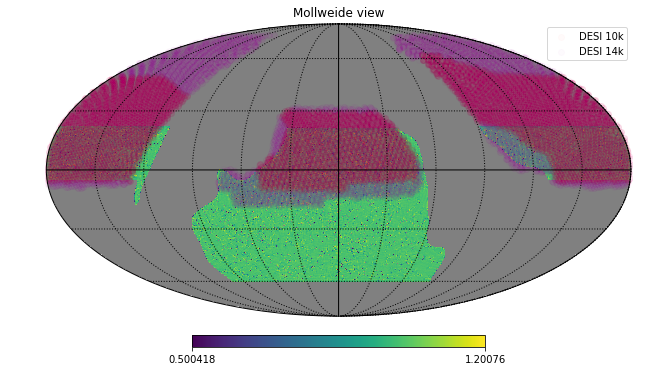

In [14]:
fig=plt.figure(0)
#
hp.mollview(actMaskPlot)
#
hp.projscatter(table10k['RA'], table10k['DEC'], lonlat=True, coord='E', c='r', alpha=0.02, label=r'DESI 10k')
hp.projscatter(table14k['RA'], table14k['DEC'], lonlat=True, coord='E', c='m', alpha=0.02, label=r'DESI 14k')
#
hp.graticule()

plt.legend(loc=1)

plt.show()

# Overlap HSC (blue), DESI 10k (red), DESI 14k (magenta)

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


<Figure size 432x288 with 0 Axes>

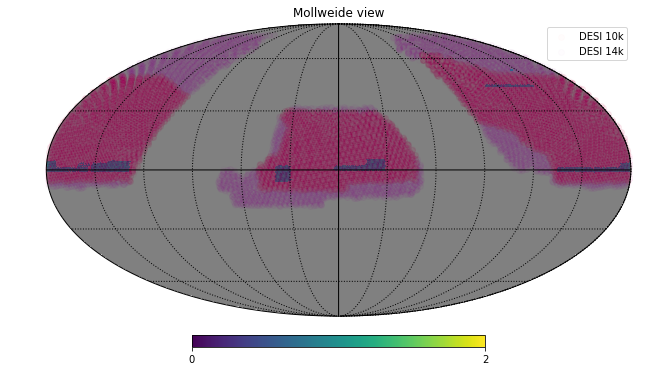

In [15]:
fig=plt.figure(0)
#
hp.mollview(hscS20APlot)
#
hp.projscatter(table10k['RA'], table10k['DEC'], lonlat=True, coord='E', c='r', alpha=0.01, label=r'DESI 10k')
hp.projscatter(table14k['RA'], table14k['DEC'], lonlat=True, coord='E', c='m', alpha=0.01, label=r'DESI 14k')
#
hp.graticule()

plt.legend(loc=1)

plt.show()

# Overlap KiDS1000 (blue), DESI 10k (red), DESI 14k (magenta)

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


<Figure size 432x288 with 0 Axes>

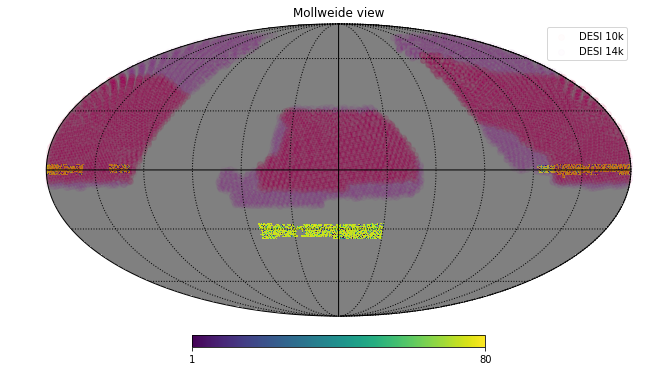

In [16]:
fig=plt.figure(0)
#
hp.mollview(kids1000Plot)
#
hp.projscatter(table10k['RA'], table10k['DEC'], lonlat=True, coord='E', c='r', alpha=0.01, label=r'DESI 10k')
hp.projscatter(table14k['RA'], table14k['DEC'], lonlat=True, coord='E', c='m', alpha=0.01, label=r'DESI 14k')
#
hp.graticule()

plt.legend(loc=1)

plt.show()